In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
import cufflinks as cf


import warnings
warnings.filterwarnings('ignore')

Sneak peek at the dataset

In [2]:
df = pd.read_csv('../Desktop/myGooglePlay.csv')

#print(df.dtypes)
#df.loc[df.App=='Tiny Scanner - PDF Scanner App']
# df[df.duplicated(keep='first')]

#df.to_csv('new.csv', sep='\t')
df = df.drop(columns = 'Index')
df.drop_duplicates(subset='App', inplace=True)
df = df[df['Android Ver'] != np.nan]
df = df[df['Android Ver'] != 'NaN']
df = df[df['Installs'] != 'Free']
df = df[df['Installs'] != 'Paid']

#print(len(df))


In [3]:
print('Number of apps in the dataset : ' , len(df))

Number of apps in the dataset :  7600


Data Cleaning:
1.Remove '+' from 'Number of Installs' to make it numeric

In [4]:
# - Installs : Remove + and ,

df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))
#print(type(df['Installs'].values))



df['Size_M'] = df['Size_M'].apply(lambda x: float(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

df['Reviews'] = df['Reviews'].apply(lambda x: int(x))
df.sample(7)

,App,Category,Rating,Reviews,Size_M,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
880,Comedy Central,Entertainment,3.9,22378,19.0,1000000.0,Free,0.0,Teen,Entertainment,"July 8, 2018",11.45.0,4.4 and up
2336,eBay: Buy & Sell this Summer - Discover Deals ...,Shopping,4.4,2788923,0.0,100000000.0,Free,0.0,Teen,Shopping,"July 30, 2018",Varies with device,Varies with device
1410,LIFULL HOME'S,Lifestyles,4.2,7573,18.0,1000000.0,Free,0.0,Everyone,House & Home,"July 25, 2018",8.2.1,4.2 and up
1853,Battlelands Royale,Games,4.4,105620,61.0,1000000.0,Free,0.0,Everyone 10+,Action,"July 16, 2018",0.5.8,4.1 and up
3151,Google Docs,Productivity,4.3,815981,0.0,100000000.0,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
821,H TV,Entertainment,4.3,103078,5.6,5000000.0,Free,0.0,Everyone,Entertainment,"July 5, 2018",4.6.2,2.3.3 and up
4365,AfterFocus,Photo & Video,4.2,165224,15.0,10000000.0,Free,0.0,Everyone,Photography,"July 8, 2016",2.1.0,4.0.3 and up


Basic EDA:
This is the basic exploratory analysis to look for any evident patterns or relationships between the features. 

In [5]:
#print(df.dtypes)

'''
x = df['Rating'].dropna()
y = df['Size_M'].dropna()
z = df['Installs'][df.Installs!=0].dropna()
p = df['Reviews'][df.Reviews!=0].dropna()
t = df['Type'].dropna()
price = df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)),columns=['Rating','Size_M', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2")
'''





'\nx = df[\'Rating\'].dropna()\ny = df[\'Size_M\'].dropna()\nz = df[\'Installs\'][df.Installs!=0].dropna()\np = df[\'Reviews\'][df.Reviews!=0].dropna()\nt = df[\'Type\'].dropna()\nprice = df[\'Price\']\n\np = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)),columns=[\'Rating\',\'Size_M\', \'Installs\', \'Reviews\', \'Type\', \'Price\']), hue=\'Type\', palette="Set2")\n'

Android market breakdown
Which category has the highest share of (active) apps in the market?

In [6]:
number_of_apps_in_category = df['Category'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = number_of_apps_in_category.index,
        values = number_of_apps_in_category.values,
        hoverinfo = 'label+value'
    
)]

plotly.offline.iplot(data, filename='active_category')

* Utilities and Game apps have the highest market prevelance.

* Social Networking, Photo & Viedo, Lifestyle and Business apps are also catching up.

Average rating of apps
--Do any apps perform really good or really bad?

In [60]:
data = [go.Histogram(
        x = df.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating = ', np.mean(df['Rating']))
plotly.offline.iplot(data, filename='overall_rating_distribution')

Average app rating =  4.170435733250039


App ratings across categories - One Way Anova Test

F_onewayResult(statistic=4.456331766303299, pvalue=7.701156218848509e-06)

The p-value is extremely small, hence we reject the null hypothesis in favor of the alternate hypothesis.



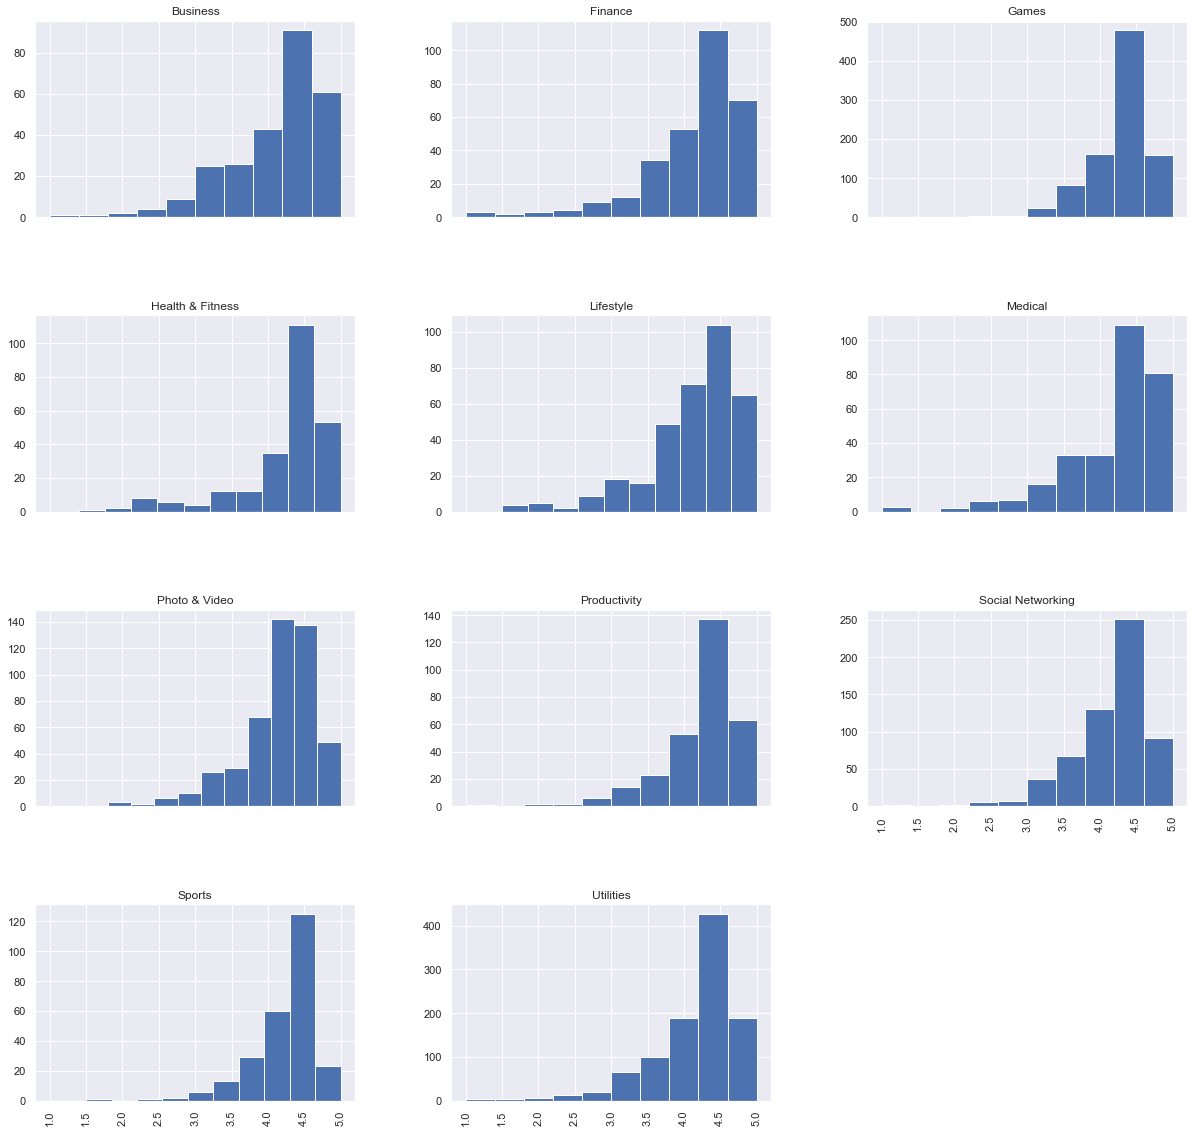

In [75]:
import scipy.stats as stats
#取排名前十的category
f = stats.f_oneway(df.loc[df.Category == 'Utilities']['Rating'].dropna(), 
               df.loc[df.Category == 'Games']['Rating'].dropna(),
               df.loc[df.Category == 'Social Networking']['Rating'].dropna(),
               df.loc[df.Category == 'Photo & Video']['Rating'].dropna(),
               df.loc[df.Category == 'Lifestyle']['Rating'].dropna(),
               df.loc[df.Category == 'Business']['Rating'].dropna(),
               df.loc[df.Category == 'Medical']['Rating'].dropna(),
               df.loc[df.Category == 'Productivity']['Rating'].dropna(),
               df.loc[df.Category == 'Finance']['Rating'].dropna(),
               df.loc[df.Category == 'Sports']['Rating'].dropna()
              )

print(f)
print('\nThe p-value is extremely small, hence we reject the null hypothesis in favor of the alternate hypothesis.\n')
#temp = df.loc[df.Category.isin(['BUSINESS', 'DATING'])]

groups = df.groupby('Category').filter(lambda x: len(x) > 286).reset_index()
array = groups['Rating'].hist(by=groups['Category'], sharex=True, figsize=(20,20))

In [76]:
# The average app ratings across categories is significantly different.

Best performing categories

In [7]:
groups = df.groupby('Category').filter(lambda x: len(x) >= 170).reset_index()
#print(type(groups.item.['BUSINESS']))
print('Average rating = ', np.nanmean(list(groups.Rating)))
#print(len(groups.loc[df.Category == 'DATING']))
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 720, len(set(groups.Category)))]


#df_sorted = df.groupby('Category').agg({'Rating':'median'}).reset_index().sort_values(by='Rating', ascending=False)
#print(df_sorted)

layout = {'title' : 'App ratings across major categories',
        'xaxis': {'tickangle':-40},
        'yaxis': {'title': 'Rating'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': [{
              'type' :'line',
              'x0': -.5,
              'y0': np.nanmean(list(groups.Rating)),
              'x1': 19,
              'y1': np.nanmean(list(groups.Rating)),
              'line': { 'dash': 'dashdot'}
          }]
          }

data = [{
    'y': df.loc[df.Category==category]['Rating'], 
    'type':'violin',
    'name' : category,
    'showlegend':False,
    #'marker': {'color': 'Set2'},
    } for i,category in enumerate(list(set(groups.Category)))]



plotly.offline.iplot({'data': data, 'layout': layout})

Average rating =  4.167058011049724


* Almost all app categories perform decently. Health and Fitness and Books and Reference produce the highest quality apps with 50% apps having a rating greater than 4.5. This is extremely high!
* On the contrary, 50% of apps in the Dating category have a rating lesser than the average rating.
* A few junk apps also exist in the Lifestyle, Family and Finance category.

Sizing Strategy - Light Vs Bulky?
How do app sizes impact the app rating?

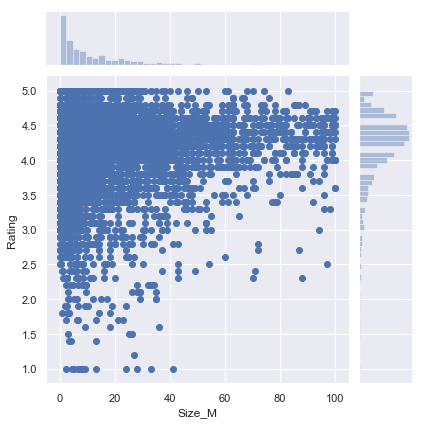

In [8]:
groups = df.groupby('Category').filter(lambda x: len(x) >= 50).reset_index()

# sns.set_style('ticks')
# fig, ax = plt.subplots()
# fig.set_size_inches(8, 8)
sns.set_style("darkgrid")
ax = sns.jointplot(df['Size_M'], df['Rating'])
#ax.set_title('Rating Vs Size')

Most top rated apps are optimally sized between ~2MB to ~40MB - neither too light nor too heavy.

In [9]:
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, len(list(set(groups.Category))))]

subset_df = df[df.Size_M > 40]
groups_temp = subset_df.groupby('Category').filter(lambda x: len(x) >20)

#for category in enumerate(list(set(groups_temp.Category))):
#     print (category)

data = [{
    'x': groups_temp.loc[subset_df.Category==category[1]]['Rating'], 
    'type':'scatter',
    'y' : subset_df['Size_M'],
    'name' : str(category[1]),
    'mode' : 'markers',
    'showlegend': True,
    #'marker': {'color':c[i]}
    #'text' : df['rating'],
    } for category in enumerate(list(set(groups_temp.Category)))]


layout = {'title':"Rating vs Size", 
          'xaxis': {'title' : 'Rating'},
          'yaxis' : {'title' : 'Size (in MB)'},
         'plot_bgcolor': 'rgb(0,0,0)'}

plotly.offline.iplot({'data': data, 'layout': layout})

# heavy_categories = [ 'ENTERTAINMENT', 'MEDICAL', 'DATING']

# data = [{
#     'x': groups.loc[df.Category==category]['Rating'], 
#     'type':'scatter',
#     'y' : df['Size'],
#     'name' : category,
#     'mode' : 'markers',
#     'showlegend': True,
#     #'text' : df['rating'],
#     } for category in heavy_categories]

Most bulky apps ( >50MB) belong to the Games and Business category. Despite this, these bulky apps are fairly highly rated indicating that they are bulky for a purpose.

Pricing Strategy - Free Vs Paid?
How do app prices impact app rating?

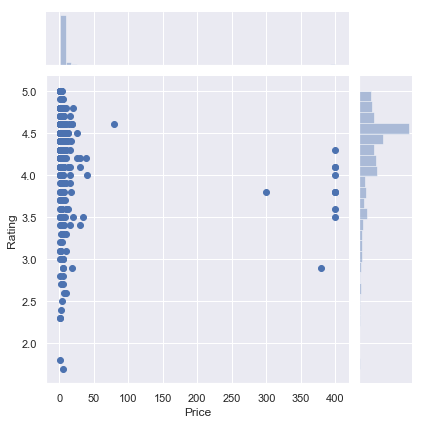

In [10]:
paid_apps = df[df.Price>0]
p = sns.jointplot( "Price", "Rating", paid_apps)

Most top rated apps are optimally priced between ~1\$ to ~30\$. There are only a very few apps priced above 20\$.

Current pricing trend - How to price your app?

In [11]:
'''
subset_df = df[df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE',
                                 'LIFESTYLE','BUSINESS'])]
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
p = sns.stripplot(x="Price", y="Category", data=subset_df, jitter=True, linewidth=1)
title = ax.set_title('App pricing trend across categories')
'''


'\nsubset_df = df[df.Category.isin([\'GAME\', \'FAMILY\', \'PHOTOGRAPHY\', \'MEDICAL\', \'TOOLS\', \'FINANCE\',\n                                 \'LIFESTYLE\',\'BUSINESS\'])]\nsns.set_style(\'darkgrid\')\nfig, ax = plt.subplots()\nfig.set_size_inches(15, 8)\np = sns.stripplot(x="Price", y="Category", data=subset_df, jitter=True, linewidth=1)\ntitle = ax.set_title(\'App pricing trend across categories\')\n'

Are paid apps downloaded as much as free apps?

In [12]:
trace0 = go.Box(
    y=np.log10(df['Installs'][df.Type=='Paid']),
    name = 'Paid',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )

)
trace1 = go.Box(
    y=np.log10(df['Installs'][df.Type=='Free']),
    name = 'Free',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
layout = go.Layout(
    title = "Number of downloads of paid apps Vs free apps",
    yaxis= {'title': 'Number of downloads (log-scaled)'}
)
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Paid apps have a relatively lower number of downloads than free apps. However, it is not too bad.

Correlations

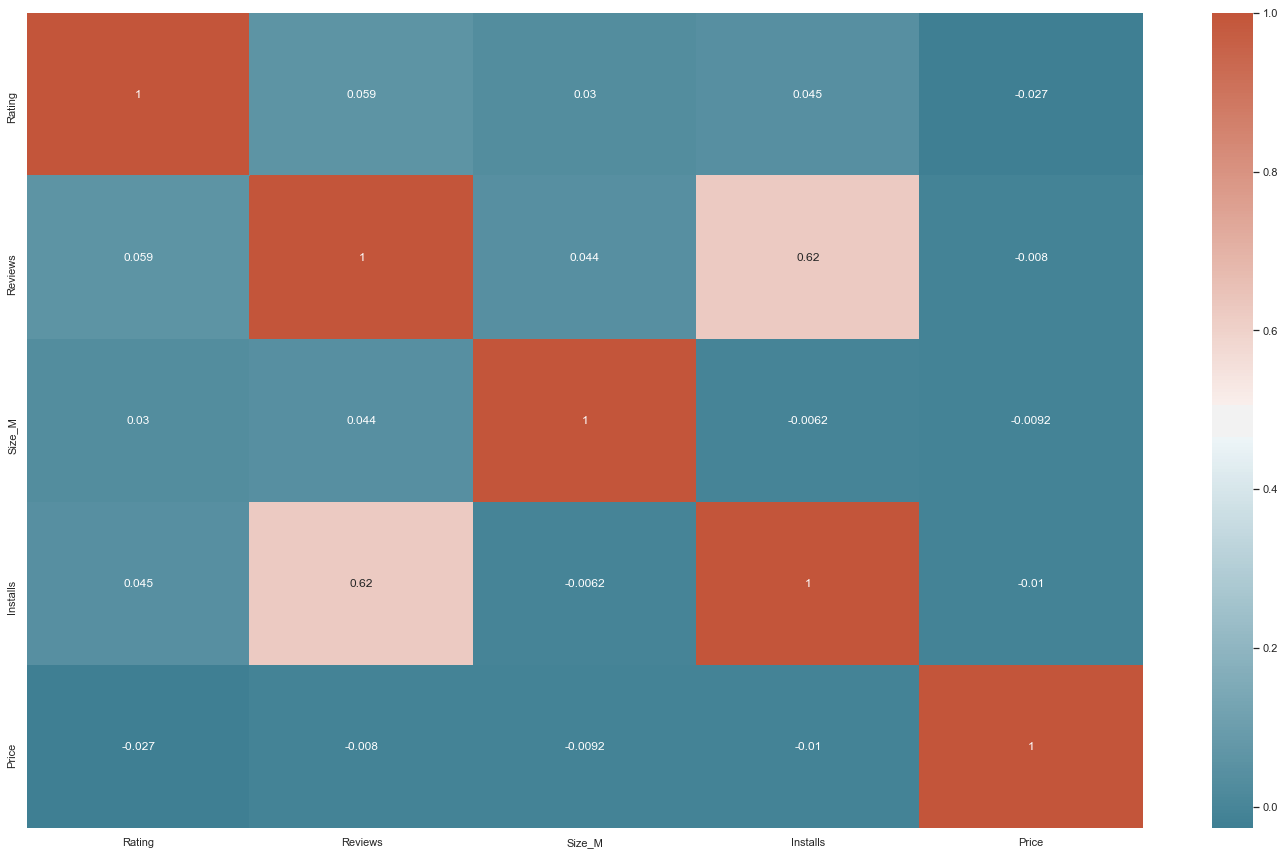

In [94]:
#df['Installs'].corr(df['Reviews'])#df['Insta 
#print(np.corrcoef(l, rating))

corrmat = df.corr()
#f, ax = plt.subplots()
p =sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


Correlations between 'Installs' and 'Reviews'

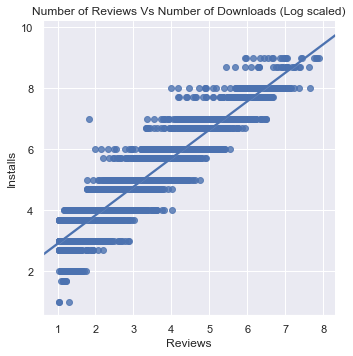

In [96]:
df_copy = df.copy()

df_copy = df_copy[df_copy.Reviews > 10]
df_copy = df_copy[df_copy.Installs > 0]

df_copy['Installs'] = np.log10(df['Installs'])
df_copy['Reviews'] = np.log10(df['Reviews'])

sns.lmplot("Reviews", "Installs", data=df_copy)
ax = plt.gca()
_ = ax.set_title('Number of Reviews Vs Number of Downloads (Log scaled)')

A moderate positive correlation of 0.62 exists between the number of reviews and number of downloads. This means that customers tend to download a given app more if it has been reviewed by a larger number of people.

This also means that many active users who download an app usually also leave back a review or feedback.

So, getting your app reviewed by more people maybe a good idea to increase your app's capture in the market!

Basic sentiment analysis - User reviews

In [14]:
reviews_df = pd.read_csv('../Desktop/googleplaystore_user_reviews.csv')

In [15]:
merged_df = pd.merge(df, reviews_df, on = "App", how = "inner")
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

grouped_sentiment_category_count = merged_df.groupby(['Category', 'Sentiment']).agg({'App': 'count'}).reset_index()
grouped_sentiment_category_sum = merged_df.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()

new_df = pd.merge(grouped_sentiment_category_count, grouped_sentiment_category_sum, on=["Category"])
#print(new_df)
new_df['Sentiment_Normalized'] = new_df.App/new_df.Sentiment_y
new_df = new_df.groupby('Category').filter(lambda x: len(x) ==3)
# new_df = new_df[new_df.Category.isin(['HEALTH_AND_FITNESS', 'GAME', 'FAMILY', 'EDUCATION', 'COMMUNICATION', 
#                                      'ENTERTAINMENT', 'TOOLS', 'SOCIAL', 'TRAVEL_AND_LOCAL'])]
new_df

trace1 = go.Bar(
    x=list(new_df.Category[::3])[6:-5],
    y= new_df.Sentiment_Normalized[::3][6:-5],
    name='Negative',
    marker=dict(color = 'rgb(209,49,20)')
)

trace2 = go.Bar(
    x=list(new_df.Category[::3])[6:-5],
    y= new_df.Sentiment_Normalized[1::3][6:-5],
    name='Neutral',
    marker=dict(color = 'rgb(49,130,189)')
)

trace3 = go.Bar(
    x=list(new_df.Category[::3])[6:-5],
    y= new_df.Sentiment_Normalized[2::3][6:-5],
    name='Positive',
    marker=dict(color = 'rgb(49,189,120)')
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Sentiment analysis',
    barmode='stack',
    xaxis = {'tickangle': -45},
    yaxis = {'title': 'Fraction of reviews'}
)

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot({'data': data, 'layout': layout})

Health & Fitness apps perform the best, having more than 77% positive reviews.
On the contrary, many Game and News apps perform bad leading to 50% positive and 50% negative.

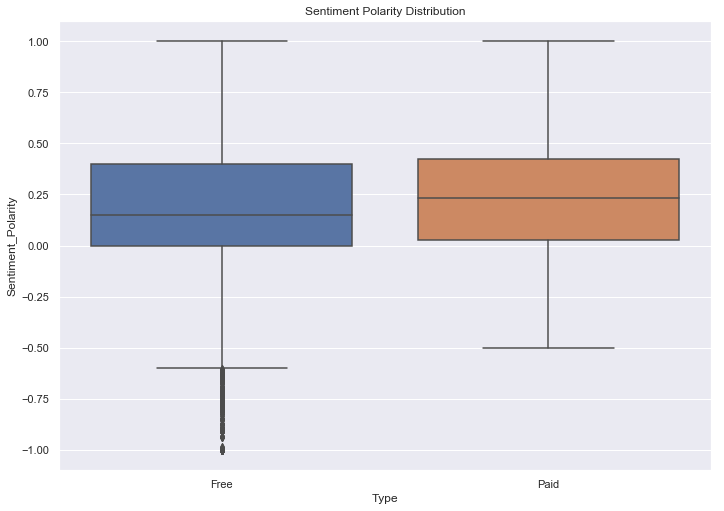

In [99]:
#merged_df.loc[merged_df.Type=='Free']['Sentiment_Polarity']
sns.set_style('ticks')
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df)
title = ax.set_title('Sentiment Polarity Distribution')

Free apps receive a lot of harsh comments which are indicated as outliers on the negative Y-axis.

Users are more lenient and tolerant while reviewing paid apps - moderate choice of words. They are never extremely negative while reviewing a paid app.

WORDCLOUD - A quick look on reviews

In [104]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=200, colormap="Set2")
# generate word cloud

from nltk.corpus import stopwords



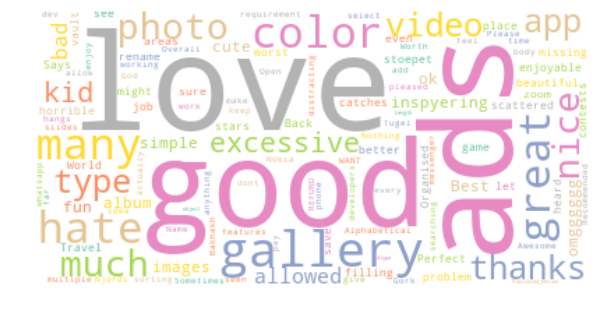

In [106]:
stop = stopwords.words('english')
stop = stop + ['app', 'APP' ,'ap', 'App', 'apps', 'application', 'browser', 'website', 'websites', 'chrome', 'click', 'web', 'ip', 'address',
            'files', 'android', 'browse', 'service', 'use', 'one', 'download', 'email', 'Launcher']

#merged_df = merged_df.dropna(subset=['Translated_Review'])
merged_df['Translated_Review'] = merged_df['Translated_Review'].apply(lambda x: " ".join(x for x in str(x).split(' ') if x not in stop))
#print(any(merged_df.Translated_Review.isna()))
merged_df.Translated_Review = merged_df.Translated_Review.apply(lambda x: x if 'app' not in x.split(' ') else np.nan)
merged_df.dropna(subset=['Translated_Review'], inplace=True)


free = merged_df.loc[merged_df.Type=='Free']['Translated_Review'].apply(lambda x: '' if x=='nan' else x)
wc.generate(''.join(str(free)))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

FREE APPS

Negative words: ads, bad, hate

Positive words: good, love, best, great

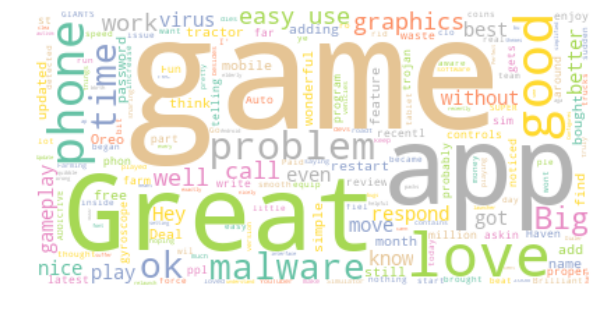

In [107]:
paid = merged_df.loc[merged_df.Type=='Paid']['Translated_Review'].apply(lambda x: '' if x=='nan' else x)
wc.generate(''.join(str(paid)))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

PAID APPS

Negative words: malware, problem

Positive words: great, love, easy

CONCLUSION
Average rating of (active) apps on Google Play Store is 4.17.
Users prefer to pay for apps that are light-weighted. Thus, a paid app that is bulky may not perform well in the market.
Most of the top rated apps are optimally sized between ~2MB to ~40MB - neither too light nor too heavy.
Most of the top rated apps are optimally priced between ~1\$ to ~30\$ - neither too cheap nor too expensive.
Medical and Family apps are the most expensive and even extend upto 80\$.
Users tend to download a given app more if it has been reviewed by a large number of people.
Health and Fitness apps receive more than 85% positive reviews. Game and Social apps receive mixed feedback - 50% positive and 50% negative.
Users are more grim and harsh while reviewing free apps than paid apps.